### Computação Quântica com Qiskit <br> Autor: Jonas Maziero

# Algumas portas lógicas do IBMQ

A descrição das portas lógicas do IBMQ pode ser encontrada em https://qiskit.org/documentation/apidoc/circuit_library.html.

Um sumário de operações quânticas pode ser encontrado em https://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html.

## Sobre kets

### Base computacional
$$|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, |1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}$$

### Estado geral
$$|\psi\rangle = \begin{bmatrix} c_{0} \\ c_{1} \end{bmatrix} = c_{0}\begin{bmatrix} 1 \\ 0 \end{bmatrix}+c_{1}\begin{bmatrix} 0 \\ 1 \end{bmatrix} = c_{0}|0\rangle+c_{1}|1\rangle$$ com $c_{j}\in\mathbb{C}$

### Produto tensorial
$$|\psi\rangle\otimes|\psi'\rangle = \begin{bmatrix} c_{0} \\ c_{1} \end{bmatrix}\otimes\begin{bmatrix} c_{0}' \\ c_{1}' \end{bmatrix} = \begin{bmatrix} c_{0}c_{0}' \\ c_{0}c_{1}' \\ c_{1}c_{0}' \\ c_{1}c_{1}' \end{bmatrix}$$

Como comentado anteriormente, todos os qubits começam no estado $|0\rangle$. Ou seja, o estado inicial global é
$$|0\rangle\otimes|0\rangle\otimes\cdots\otimes|0\rangle.$$

## Portas lógicas de 1 qubit

### NOT ou X
$$X=\begin{bmatrix}0&1\\1&0\end{bmatrix}$$
Assim $X|0\rangle=|1\rangle$ e $X|1\rangle=|0\rangle$

### Y
$$Y=\begin{bmatrix}0&-i\\i&0\end{bmatrix}$$
Assim $Y|0\rangle=i|1\rangle$ e $Y|1\rangle=-i|0\rangle$

### Z
$$Z=\begin{bmatrix}1&0\\0&-1\end{bmatrix}$$
Assim $Z|0\rangle=|0\rangle$ e $Z|1\rangle=-|1\rangle$

Essas portas lógicas são adicionadas ao circuito conforme demonstrado a seguir.

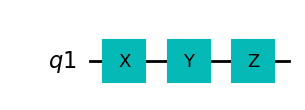

In [3]:
from qiskit import *
qr = QuantumRegister(1)
qc = QuantumCircuit(qr)
qc.x(qr[0])
qc.y(qr[0])
qc.z(qr[0])
qc.draw('mpl')

### Porta de Hadamard
Muda da base $\{|0\rangle,|1\rangle\}$ para a base $\{|+\rangle,|-\rangle\}$, em que 
$$|\pm\rangle=(|0\rangle\pm|1\rangle)/\sqrt{2},$$
e vice-versa:
$$H = \frac{1}{\sqrt{2}}\begin{bmatrix}1&1\\1&-1\end{bmatrix}$$

### Porta $U$ (rotação geral)
\begin{align}
U(\theta,\phi,\lambda) & = RZ(\phi)RX(-\pi/2)RZ(\theta)RX(\pi/2)RZ(\lambda) \\
& = \begin{bmatrix} \cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\ e^{i\phi}\sin(\theta/2) & e^{i(\phi+\lambda)}\cos(\theta/2) \end{bmatrix}
\end{align}
Assim, e.g.,
\begin{align}
& U|0\rangle = \cos(\theta/2)|0\rangle + e^{i\phi}\sin(\theta/2)|1\rangle, \\
& U|1\rangle = -e^{i\lambda}\sin(\theta/2)|0\rangle + e^{i(\phi+\lambda)}\cos(\theta/2)|1\rangle.
\end{align}

O código qiskit para implementar essas portas está mostrado abaixo.

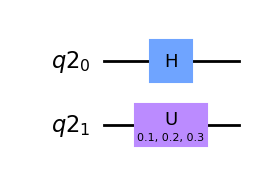

In [4]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr) # repetir isso para iniciar o circuit quântico sem as portas adicionadas anteriormente
qc.h(0) # essa é outra forma mais suscinta de escrever em qual qubit aplicar a porta lógica
th, ph, lb = 0.1, 0.2, 0.3 # valores dos parâmetros a serem usados. É possível também declará-los como prâmetros dos CQ
qc.u(th,ph,lb, qr[1])
qc.draw('mpl')

### Porta $S$ ($S^{\dagger}$)
Essa porta lógica é representada matricialmente por
\begin{align}
S = \begin{bmatrix}1&0\\0&i\end{bmatrix}\ \therefore\ S^{\dagger} = \begin{bmatrix}1&0\\0&-i\end{bmatrix},
\end{align}
e induz uma fase $\pi/2$ no estado $|1\rangle$:
\begin{align}
S|0\rangle=|0\rangle, S|1\rangle=i|1\rangle = e^{i\pi/2}|1\rangle.
\end{align}

### Porta de fase $P$
Essa porta lógica é representada matricialmente por
\begin{align}
P(\theta) = \begin{bmatrix}1&0\\0&e^{i\theta}\end{bmatrix}
\end{align}
e induz uma fase $\theta$ no estado $|1\rangle$:
\begin{align}
P(\theta)|0\rangle=|0\rangle, P(\theta)|1\rangle = e^{i\theta}|1\rangle.
\end{align}

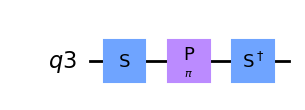

In [5]:
import math
qr = QuantumRegister(1)
qc = QuantumCircuit(qr)
qc.s(0)
th = math.pi
qc.p(th, 0)
qc.sdg(0)
qc.draw('mpl')

## Medidas

### Medidas na base $\{|0\rangle,|1\rangle\}$
Medidas nessa base, usualmente chamada de base $Z$, são implementadas diretamente no IBMQ.

### Medidas na base $\{|+\rangle,|-\rangle\}$
Notamos que
\begin{align}
Pr(+|\psi) = |\langle +|\psi\rangle|^{2} \equiv |\langle 0|H|\psi\rangle|^{2} =: |\langle 0|\psi'\rangle|^{2} = Pr(0|\psi')
\end{align}
Vemos facilmente que o análog vale para $Pr(-|\psi)=Pr(1|\psi')$, com $$|\psi'\rangle=H|\psi\rangle.$$
Portanto, medidas na base $\{|0\rangle,|1\rangle\}$, usualmente chamada de base $X$, são implementadas aplicando-se uma porta de Hadamard e subsequentemente fzendo-se medida na base $Z$.

### Medidas na base $\{|\oplus\rangle,|\ominus\rangle\}$
Temos que
\begin{align}
& S|+\rangle = (S|0\rangle+S|1\rangle)/\sqrt{2} = (|0\rangle+i|1\rangle)/\sqrt{2} = |\oplus\rangle \ \therefore \langle\oplus|=\langle+|S^{\dagger}=\langle 0|HS^{\dagger}, \\
& S|-\rangle = (S|0\rangle-S|1\rangle)/\sqrt{2} = (|0\rangle-i|1\rangle)/\sqrt{2} = |\ominus\rangle \ \therefore \langle\ominus|=\langle-|S^{\dagger}=\langle 1|HS^{\dagger}.
\end{align}
Vem assim que
\begin{align}
Pr(\oplus|\psi) = |\langle\oplus|\psi\rangle|^{2} \equiv |\langle 0|HS^{\dagger}|\psi\rangle|^{2} =: |\langle 0|\psi'\rangle|^{2} = Pr(0|\psi')
\end{align}
com 
$$|\psi'\rangle = HS^{\dagger}|\psi\rangle.$$
Analogamente, $Pr(\ominus|\psi)=Pr(1|\psi')$.

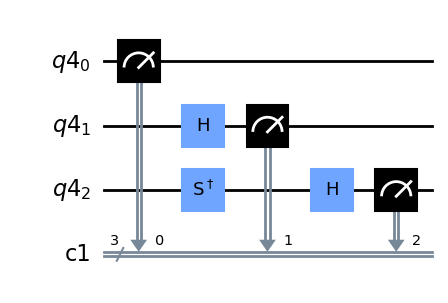

In [6]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr,cr)
# medida de Z
qc.measure(qr[0],cr[0])
# medida de X
qc.h(1)
qc.measure(1,1)
# medida de Y
qc.sdg(2)
qc.h(2)
qc.measure(2,2)
qc.draw('mpl')

## Portas lógicas de 2 ou mais qubits
Em https://qiskit.org/documentation/apidoc/circuit_library.html, você encontrará com incluir várias outras portas controladas.

### Control-Not (CNOT=CX)
\begin{align}
CNOT_{c\rightarrow t} = |0\rangle\langle 0|\otimes \mathbb{I} +  |1\rangle\langle 1|\otimes X
\end{align}
Ação da CNOT_12
\begin{align}
& CNOT_{c\rightarrow t}|0\rangle\otimes|0\rangle = |0\rangle\langle 0||0\rangle\otimes \mathbb{I}|0\rangle +  |1\rangle\langle 1||0\rangle\otimes X|0\rangle = |0\rangle\otimes|0\rangle, \\
& CNOT_{c\rightarrow t}|0\rangle\otimes|1\rangle = |0\rangle\otimes|1\rangle, \\
& CNOT_{c\rightarrow t}|1\rangle\otimes|0\rangle = |1\rangle\otimes|1\rangle, \\
& CNOT_{c\rightarrow t}|1\rangle\otimes|1\rangle = |1\rangle\otimes|0\rangle.
\end{align}
Ou seja,
$$CNOT_{c\rightarrow t}|j\rangle\otimes|k\rangle = |j\rangle\otimes|j\oplus k\rangle$$

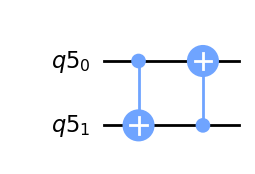

In [7]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)
qc.cx(qr[0],qr[1])
qc.cx(1,0)
qc.draw('mpl') # essas 3 cnots são equivalentes à porta swap

### SWAP (troca)

Pode ser escrita como
$$SWAP = CNOT_{12}\ CNOT_{21}\ CNOT_{12}$$
Ela troca os estados dos qubits na qual é aplicada.
#### Exemplo
Considera $|\Psi\rangle = (a_{0}|0\rangle+a_{1}|1\rangle)\otimes(b_{0}|0\rangle+b_{1}|1\rangle) = a_{0}b_{0}|00\rangle + a_{0}b_{1}|01\rangle + a_{1}b_{0}|10\rangle + a_{1}b_{1}|11\rangle$. Teremos
\begin{align}
SWAP|\Psi\rangle & = a_{0}b_{0}CNOT_{12}\ CNOT_{21}\ CNOT_{12}|00\rangle + a_{0}b_{1}CNOT_{12}\ CNOT_{21}\ CNOT_{12}|01\rangle \\
& \ + a_{1}b_{0}CNOT_{12}\ CNOT_{21}\ CNOT_{12}|10\rangle + a_{1}b_{1}CNOT_{12}\ CNOT_{21}\ CNOT_{12}|11\rangle \\
& = a_{0}b_{0}CNOT_{12}\ CNOT_{21}|00\rangle + a_{0}b_{1}CNOT_{12}\ CNOT_{21}|01\rangle \\
& \ + a_{1}b_{0}CNOT_{12}\ CNOT_{21}|11\rangle + a_{1}b_{1}CNOT_{12}\ CNOT_{21}|10\rangle \\
& = a_{0}b_{0}CNOT_{12}|00\rangle + a_{0}b_{1}CNOT_{12}|11\rangle + a_{1}b_{0}CNOT_{12}|01\rangle + a_{1}b_{1}CNOT_{12}|10\rangle \\
& = a_{0}b_{0}|00\rangle + a_{0}b_{1}|10\rangle + a_{1}b_{0}|01\rangle + a_{1}b_{1}|11\rangle \\
& = (b_{0}|0\rangle + b_{1}|1\rangle)\otimes a_{0}|0\rangle + (b_{0}|0\rangle + b_{1}|1\rangle)\otimes a_{1}|1\rangle \\
& = (b_{0}|0\rangle + b_{1}|1\rangle)\otimes(a_{0}|0\rangle + a_{1}|1\rangle).
\end{align}

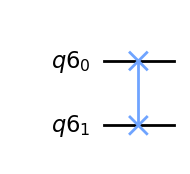

In [8]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)
qc.swap(0,1)
qc.draw('mpl')

### $U$ controlada
$$CU(\theta,\phi,\lambda,\gamma) = |0\rangle\langle 0 |\otimes I + |1\rangle\langle 1|\otimes e^{i\gamma}U(\theta,\phi,\lambda).$$

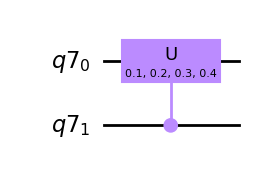

In [9]:
qr = QuantumRegister(2)
qc = QuantumCircuit(qr)
th, ph, lb, ga = 0.1, 0.2, 0.3, 0.4
qc.cu(th,ph,lb,ga, 1,0)
qc.draw('mpl')

Porta de Toffolli
$$C_{CX} = |0\rangle\langle 0|\otimes I_{4} + |1\rangle\langle 1|\otimes C_{x}$$

### Multi-controlled gates

Digamos que queremos aplicar a rotação $R_y (\theta)$ condicionada no estado de 2 qubits. Por exemplo
$$C_{R_y(\theta)}^{02\rightarrow 1} = |0\rangle\langle 0|\otimes\mathbb{I}\otimes|0\rangle\langle 0| + |0\rangle\langle 0|\otimes\mathbb{I}\otimes|1\rangle\langle 1| + |1\rangle\langle 1|\otimes\mathbb{I}\otimes|0\rangle\langle 0| + |1\rangle\langle 1|\otimes R_y(\theta)\otimes|1\rangle\langle 1|.$$
Essa operação pode ser implementada com o código abaixo.

In [14]:
def qc_ry(th):
    qr = QuantumRegister(1)
    qc = QuantumCircuit(qr, name = 'RY')
    qc.ry(th, 0)
    return qc

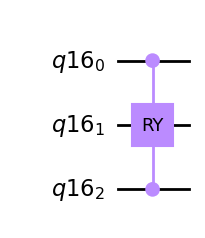

In [18]:
qr = QuantumRegister(3)
qc = QuantumCircuit(qr)
qc_ry_ = qc_ry(math.pi)
ccry = qc_ry_.to_gate().control(2)
qc.append(ccry, [0, 2, 1])
qc.draw(output = 'mpl')

# Barreiras
Seguindo (https://youtu.be/CdoCPz6TC9k), considere o circuito abaixo.

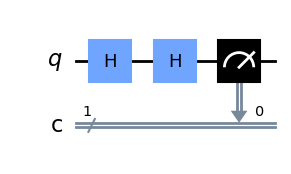

In [19]:
from qiskit import *
qc = QuantumCircuit(1, 1)
qc.h([0])
qc.h([0])
qc.measure([0], [0])
qc.draw(output = 'mpl')

Quando este circuito for enviado para ser executado no chip real, o transpiler notará que $HH=I$ e simplesmente não aplicará nenhuma operação. Ou seja, esse circuito será equivalente a preparar o estado $|0\rangle$ e medir na base computacional. Mas isso, na prática, é bem diferente que aplicar duas portas de Hadamard em sequência, por causa dos erros inevitáveis associados. Para obrigar transpiler a excecutar as portas de Hadamard, usamos a barrier() entre essas portas, como mostrado no circuito abaixo.

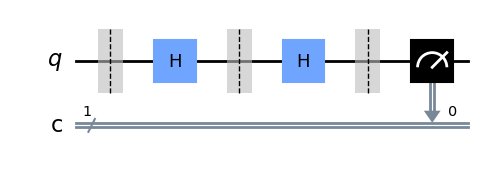

In [20]:
qc = QuantumCircuit(1, 1)
qc.barrier()
qc.h([0])
qc.barrier()
qc.h([0])
qc.barrier()
qc.measure([0], [0])
qc.draw(output = 'mpl')

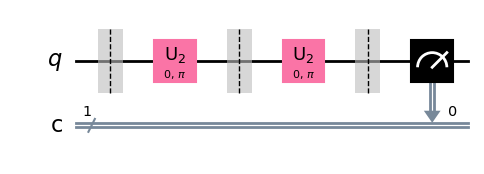

In [23]:
qc.decompose().draw(output = 'mpl')

# Reset
A função reset (https://youtu.be/mFxtSlnZcM8) pode ser utilizada para colocar o estado de um qubit de volta no estado $|0\rangle$, mesmo no meio da execução de um circuito. Como isso é feito em toda preparação do estado inicial dos qubits, se espera que essa seja um operação feita como pouco erro, relativo às outras operações.

Para ver uma situação onde a função reset pode ser útil para diminuir o número de qubits necessários, considere o exemplo do circuit abaixo.

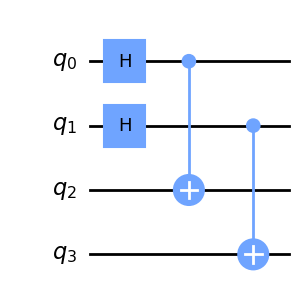

In [24]:
qc = QuantumCircuit(4)
qc.h([0])
qc.cx([0], [2])
qc.h([1])
qc.cx([1], [3])
qc.draw(output = 'mpl')

Usando reset, podemos implementar essa mesmo operação nos qubits 2 e 3 mas usando um qubit auxiliar a menos, como exemplificado no circuit abaixo.

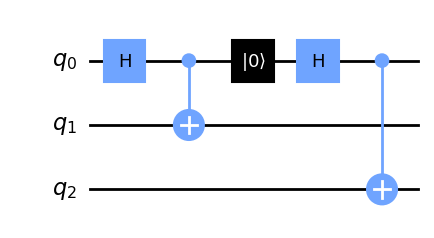

In [25]:
qc = QuantumCircuit(3)
qc.h([0])
qc.cx([0], [1])
qc.reset([0])
qc.h([0])
qc.cx([0], [2])
qc.draw(output = 'mpl')